In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding="latin1")  # or try "utf-8-sig", "ISO-8859-1", etc.

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.sample(3)

,v1,v2
2595,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
390,ham,Huh so late... Fr dinner?
1448,spam,As a registered optin subscriber ur draw 4 å£1...


In [9]:
#renaming the columns 
df.rename(columns={ 'v1': 'target', 'v2': 'text' }, inplace=True)

In [10]:
df.sample(2)

,target,text
2073,spam,FreeMsg: Claim ur 250 SMS messages-Text OK to ...
1563,ham,Get ready to put on your excellent sub face :)


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
1106,0,"Good afternoon, my love. How goes your day ? W..."
3664,0,Ha... U jus ate honey ar? So sweet...
3406,0,Beautiful Truth against Gravity.. Read careful...
2237,0,"Give her something to drink, if she takes it a..."
388,1,4mths half price Orange line rental & latest c...


In [14]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(403)

In [16]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
# pip install matplotlib

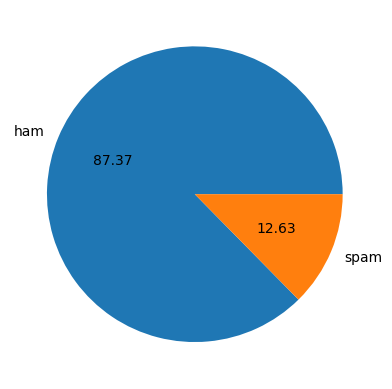

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [21]:
#data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/saykarim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

/var/folders/pv/41146rrd66x0kjx34gwwvlg80000gq/T/ipykernel_65343/253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [25]:
df.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [29]:
#num of words 

# df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

df['text'].apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [31]:
import nltk
print(nltk.data.path)

# from nltk.tokenize import word_tokenize

# df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

['/Users/saykarim/nltk_data', '/Users/saykarim/Desktop/ai-ml/u-tube/email_spam/myenv/nltk_data', '/Users/saykarim/Desktop/ai-ml/u-tube/email_spam/myenv/share/nltk_data', '/Users/saykarim/Desktop/ai-ml/u-tube/email_spam/myenv/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [32]:
ls /Users/saykarim/nltk_data/tokenizers

punkt/     punkt.zip


In [33]:
import nltk
nltk.data.path = ['/Users/saykarim/nltk_data']

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saykarim/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords

In [39]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'himself', 'but', 'have', 'about', "that'll", 'she', 'won', 'too', 'had', 'above', 'their', 'y', 'in', 'not', 'any', 'than', "couldn't", "shouldn't", 'here', 'hers', "wouldn't", 'hadn', 'against', 'now', 'again', 'is', 'o', 'that', 'only', "don't", 'didn', 'you', "you'd", 'weren', 'own', "mustn't", 'isn', 'should', "shan't", 'or', 'such', 'nor', 'these', 'shan', 'while', 'did', 'a', 'herself', 'theirs', 'll', 'of', 'i', 'all', "hasn't", 'those', 'myself', 'when', 'just', 'itself', 'does', 'yours', 'off', 'most', "weren't", 'his', 'them', 're', 'mustn', 'other', 'same', 'so', 'ma', 'can', 'the', 'why', 'has', "you'll", 'our', "should've", 'each', 'whom', 't', "she's", 'will', 'more', 'further', 'and', 'to', 'be', 'into', 'this', 'my', 'with', "won't", 'until', 'at', "isn't", 'having', 'which', 'couldn', 'do', 'wouldn', 'they', 'few', "hadn't", 'her', "haven't", 'for', 'it', 'by', 'ours', 'between', 'were', 'below', 'under', 'both', 'because', 'how', 'needn', "you've", 'very', 'haven', 

In [40]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
text = "Python is an amazing programming language. Python is widely used for data analysis, machine learning, and web development."

In [43]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

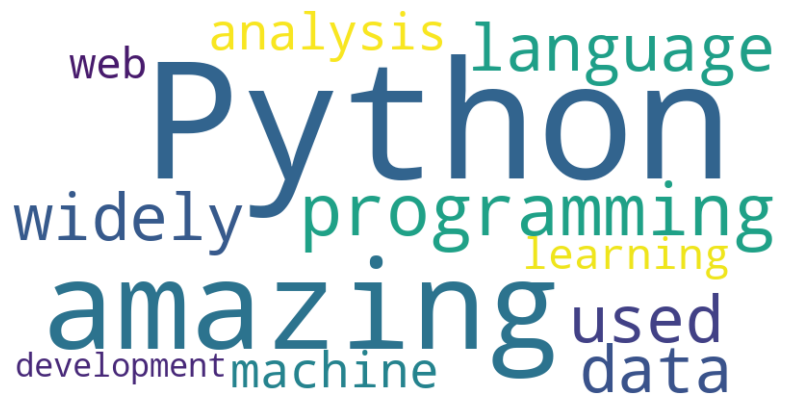

In [44]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axes
plt.show()